### The objective of the case study is to analyze customer reviews and predict customer satisfaction with the reviews:
### 1) Data processing
### 2) Key positive words/ negative words (most frequent words)
### 3) Classification of reviews into positive, negative and neutral
### 4) Identify key themes of problems (using clustering, topic models)
### 5) Predicting star ratings using reviews
### 6) Perform Intent Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression
import scipy.stats as stats

In [2]:
reviews_data=pd.read_excel('C:/Users/Lenovo/Desktop/5. Bank Reviews-Complaints Analysis/BankReviews.xlsx')

In [3]:
reviews_data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [4]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [5]:
#Preprocessing
lemmatizer=WordNetLemmatizer()
stopwords_list=nltk.corpus.stopwords.words('english')
for x in range(0,len(reviews_data.Reviews)):
    rev=''
    tokens=word_tokenize(reviews_data.Reviews[x])
    for word in tokens:
        word=word.strip()
        if(word.casefold() not in stopwords_list):
            word=word.lower()+' '
            word=lemmatizer.lemmatize(word)
            rev=rev+word
    rev=re.sub('[-,`.\'\"!?)($&;%#*/0-9]',"",rev)
    rev=rev.strip()
    reviews_data.Reviews[x]=rev

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Classification of reviews into positive, negative and neutral

In [6]:
reviews_data['Polarity']=0
for x in range(0,len(reviews_data)):
    review=reviews_data.Reviews[x]
    if(TextBlob(review).polarity>0):
        reviews_data['Polarity'][x]='Positive'
    elif(TextBlob(review).polarity==0):
        reviews_data['Polarity'][x]='Neutral'
    else:
        reviews_data['Polarity'][x]='Negative'

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7

In [7]:
reviews_data.head()

,Date,Stars,Reviews,BankName,Polarity
0,2017-04-10,5,great job wyndham capital person professiona...,Wyndham Capital Mortgage,Positive
1,2017-02-10,5,matthew richardson professional helpful helpe...,Wyndham Capital Mortgage,Positive
2,2017-08-21,5,past experience wyndham mortgage would without...,Wyndham Capital Mortgage,Negative
3,2017-12-17,5,dealing brad thomka beginning started stressfu...,Wyndham Capital Mortgage,Positive
4,2016-05-27,5,ca nt express grateful support zach provided f...,Wyndham Capital Mortgage,Positive


### Key positive/negative words (most frequent words)

In [8]:
pos_rev=''
neg_rev=''
neg_rev_list=[]
for x in range(0,len(reviews_data)):
    if(reviews_data.Polarity[x]=='Positive'):
        pos_rev+=reviews_data.Reviews[x]+' '
    elif(reviews_data.Polarity[x]=='Negative'):
        neg_rev+=reviews_data.Reviews[x]+' '
        neg_rev_list.append(reviews_data.Reviews[x])
pos_rev=pos_rev.strip()
neg_rev=neg_rev.strip()

In [9]:
pos_list=[]
for x in nltk.pos_tag(word_tokenize(pos_rev)):
    if(x[1].startswith('NN')):
        pos_list.append(x[0])

In [10]:
neg_list=[]
for x in nltk.pos_tag(word_tokenize(neg_rev)):
    if(x[1].startswith('NN')):
        neg_list.append(x[0])

In [11]:
fdist_pos=nltk.FreqDist(nltk.text.Text(pos_list))
fdist_neg=nltk.FreqDist(nltk.text.Text(neg_list))

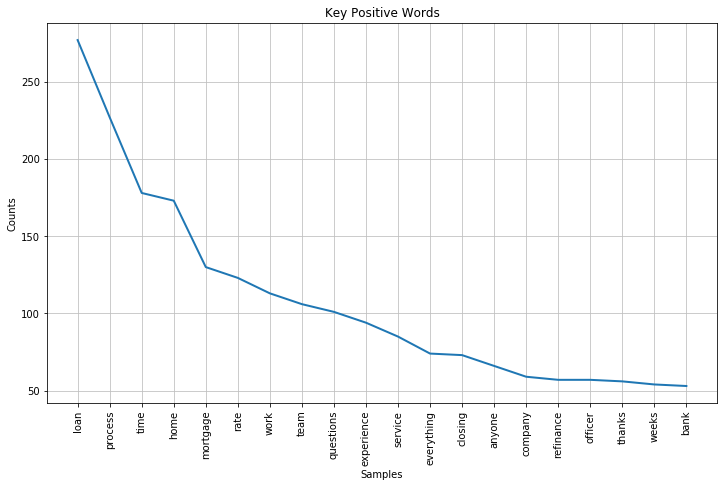

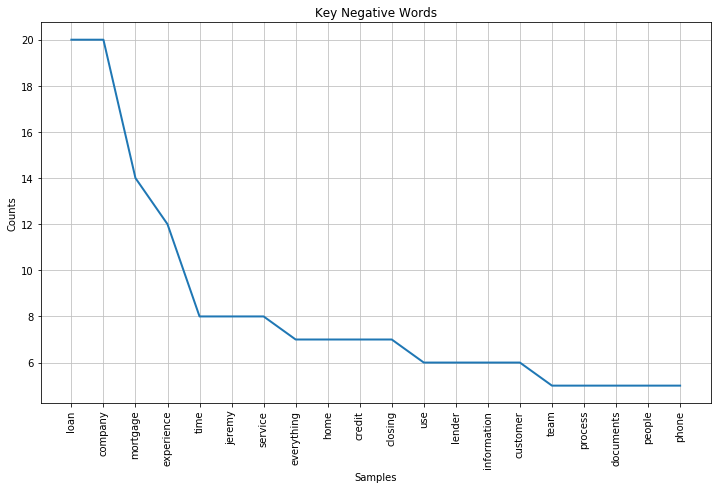

In [12]:
plt.figure(figsize=(12,7))
plt.title('Key Positive Words')
fdist_pos.plot(20)
plt.show()
plt.figure(figsize=(12,7))
plt.title('Key Negative Words')
fdist_neg.plot(20)
plt.show()

### Identifying key themes of problems and Intent analysis

In [13]:
#Clustering and then applying Topic Modelling on each of the clusters(For 4 and 6 parts)

In [14]:
low_rate_rev_list=reviews_data[reviews_data.Stars==1].Reviews

In [15]:
vect=TfidfVectorizer(ngram_range=(2,3),min_df=0.01,max_df=0.90,binary=False,stop_words='english')

In [16]:
reviews_tdm_df=pd.DataFrame(vect.fit_transform(low_rate_rev_list).toarray(),
                            columns=vect.get_feature_names())

In [17]:
reviews_tdm_df.shape

(95, 6734)

In [18]:
reviews_tdm_df=reviews_tdm_df.apply(lambda x: x.clip(lower=x.dropna().quantile(0.01),upper=x.quantile(0.99)))

In [19]:
#Scaling the data

In [20]:
reviews_tdm_df_scaled=pd.DataFrame(StandardScaler().fit_transform(reviews_tdm_df))

In [21]:
#Dimension Reduction
pc=PCA(n_components=95)
pc.fit(reviews_tdm_df_scaled)
ei=pc.explained_variance_

In [22]:
cum_var=np.cumsum(np.round(pc.explained_variance_ratio_,4)*100)

In [23]:
ei_var=pd.DataFrame([ei,cum_var]).T
ei_var.columns=['Eigen Value','Cumulative Variance']
ei_var.to_excel('C:/Users/Lenovo/Desktop/Eigen.xlsx')
ei_var

,Eigen Value,Cumulative Variance
0,3.984745e+02,5.86
1,3.839918e+02,11.50
2,3.424774e+02,16.53
3,3.278688e+02,21.35
4,3.049362e+02,25.83
5,2.801724e+02,29.95
6,2.701616e+02,33.92
7,2.438806e+02,37.50
8,2.080481e+02,40.56
9,1.833064e+02,43.25


In [24]:
pc_final=PCA(n_components=70)
dimensions=pd.DataFrame(pc_final.fit_transform(reviews_tdm_df_scaled))

In [25]:
dimensions.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-1.190334,-1.607583,-0.914512,-3.149081,-1.849948,-0.041133,-3.804998,-2.327383,-1.516750,-1.810131,...,-0.087905,-0.065001,-0.009004,-0.293734,0.005146,-4.872373e-15,-0.076335,-0.038861,-0.191148,-0.116191
1,-1.183175,-1.230500,-0.854363,-2.929080,-1.712040,-0.037806,-3.483302,-2.106844,-1.340141,-1.555155,...,-0.124758,-0.091651,-0.012743,-0.408731,0.007142,4.646955e-15,-0.105244,-0.056845,-0.257766,-0.153232
2,-0.884857,-1.545115,-0.775773,-3.021124,-1.795638,-0.041446,-3.699401,-2.263241,-1.472136,-1.775236,...,-0.109953,-0.070511,-0.045683,-0.467071,-0.256440,-1.119676e-14,-0.048155,-0.041386,-0.298622,-0.111486
3,-1.046549,-1.511024,-0.687997,-2.843549,-1.684593,-0.037725,-3.439474,-2.082683,-1.173324,-1.519436,...,-0.130262,-0.078066,-0.011029,-0.446857,0.009760,-3.915065e-15,-0.114795,-0.061265,-0.277751,-0.164347
4,-1.046549,-1.511024,-0.687997,-2.843549,-1.684593,-0.037725,-3.439474,-2.082683,-1.173324,-1.519436,...,-0.130262,-0.078066,-0.011029,-0.446857,0.009760,-2.887147e-16,-0.114795,-0.061265,-0.277751,-0.164347


In [26]:
#Clustering

In [27]:
km_3=KMeans(n_clusters=3,random_state=120293).fit(dimensions)
km_4=KMeans(n_clusters=4,random_state=120293).fit(dimensions)
km_5=KMeans(n_clusters=5,random_state=120293).fit(dimensions)
km_6=KMeans(n_clusters=6,random_state=120293).fit(dimensions)
km_7=KMeans(n_clusters=7,random_state=120293).fit(dimensions)
km_8=KMeans(n_clusters=8,random_state=120293).fit(dimensions)
km_9=KMeans(n_clusters=9,random_state=120293).fit(dimensions)
km_10=KMeans(n_clusters=10,random_state=120293).fit(dimensions)

In [28]:
pd.Series(km_3.labels_).value_counts()/len(dimensions)

0    0.978947
2    0.010526
1    0.010526
dtype: float64

In [29]:
pd.Series(km_4.labels_).value_counts()/len(dimensions)

0    0.968421
3    0.010526
2    0.010526
1    0.010526
dtype: float64

In [30]:
pd.Series(km_5.labels_).value_counts()/len(dimensions)

0    0.936842
4    0.031579
3    0.010526
2    0.010526
1    0.010526
dtype: float64

In [31]:
pd.Series(km_6.labels_).value_counts()/len(dimensions)

0    0.915789
4    0.031579
5    0.021053
3    0.010526
2    0.010526
1    0.010526
dtype: float64

In [32]:
pd.Series(km_7.labels_).value_counts()/len(dimensions)

0    0.884211
6    0.031579
4    0.031579
5    0.021053
3    0.010526
2    0.010526
1    0.010526
dtype: float64

In [33]:
pd.Series(km_8.labels_).value_counts()/len(dimensions)

0    0.873684
7    0.031579
5    0.031579
4    0.021053
6    0.010526
3    0.010526
2    0.010526
1    0.010526
dtype: float64

In [34]:
pd.Series(km_9.labels_).value_counts()/len(dimensions)

0    0.863158
7    0.031579
5    0.031579
4    0.021053
8    0.010526
6    0.010526
3    0.010526
2    0.010526
1    0.010526
dtype: float64

In [35]:
pd.Series(km_10.labels_).value_counts()/len(dimensions)

0    0.831579
9    0.031579
5    0.031579
1    0.031579
3    0.021053
8    0.010526
7    0.010526
6    0.010526
4    0.010526
2    0.010526
dtype: float64

In [36]:
#Silhouette Coefficient

In [37]:
scores=[]
km_3_score=metrics.silhouette_score(reviews_tdm_df,km_3.labels_)
km_4_score=metrics.silhouette_score(reviews_tdm_df,km_4.labels_)
km_5_score=metrics.silhouette_score(reviews_tdm_df,km_5.labels_)
km_6_score=metrics.silhouette_score(reviews_tdm_df,km_6.labels_)
km_7_score=metrics.silhouette_score(reviews_tdm_df,km_7.labels_)
km_8_score=metrics.silhouette_score(reviews_tdm_df,km_8.labels_)
km_9_score=metrics.silhouette_score(reviews_tdm_df,km_9.labels_)
km_10_score=metrics.silhouette_score(reviews_tdm_df,km_10.labels_)
km_range=range(3,11)
scores=[km_3_score,km_4_score,km_5_score,km_6_score,km_7_score,km_8_score,km_9_score,
        km_10_score]
scores

[-0.3920693599502868,
 -0.3887361927451632,
 -0.34671631716802065,
 -0.3169921647090621,
 -0.27381631952090413,
 -0.28512387283992097,
 -0.28155920765710696,
 -0.22900551396638935]

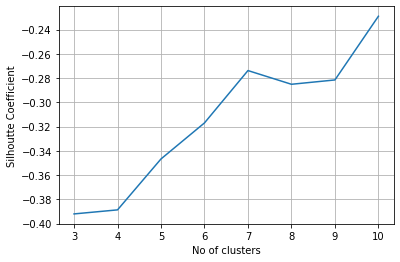

In [38]:
plt.plot(km_range,scores)
plt.xlabel('No of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.grid()
plt.show()

In [39]:
#Elbow Analysis

In [40]:
cluster_errors=[km_3.inertia_,km_4.inertia_,km_5.inertia_,km_6.inertia_,
               km_7.inertia_,km_8.inertia_,km_9.inertia_,km_10.inertia_]
cluster_errors

[565982.3466279777,
 542952.6538797728,
 517190.10394594923,
 485550.36952135287,
 454687.6906060217,
 445421.31010964885,
 419310.7883997435,
 388590.6863785141]

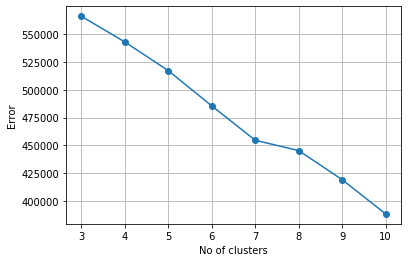

In [41]:
plt.plot(km_range,cluster_errors,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

In [42]:
#Therefore, taking number of clusters = 7

In [43]:
reviews_tdm_df['cluster']=pd.Series(km_7.labels_)

In [44]:
#TOPIC MODELLING FOR EACH CLUSTER
lda_model=LatentDirichletAllocation(n_components=8,random_state=120293)
for cluster,df in reviews_tdm_df.groupby(['cluster']):
    print('For Cluster:',cluster)
    train_topics=lda_model.fit_transform(df.iloc[:,0:-1])
    topic_word=lda_model.components_
    vocab=vect.get_feature_names()
    # view the topic models
    n_top_words = 1
    topic_summaries = []
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
        topic_summaries.append(' '.join(topic_words))

    print(topic_summaries)

For Cluster: 0
['information needed', 'registering site unprofessional', 'closing costs', 'credit card', 'poor communication', 'apr point', 'nasb rep', 'total closing']
For Cluster: 1
['day closing', 'ca nt', 'day closing', 'day closing', 'day closing', 'day closing', 'day closing', 'day closing']
For Cluster: 2
['mortgage broker', 'lender credit', 'mortgage broker', 'mortgage broker', 'mortgage broker', 'mortgage broker', 'mortgage broker', 'mortgage broker']
For Cluster: 3
['make sense', 'make sense', 'make sense', 'loan mgr', 'make sense', 'make sense', 'make sense', 'make sense']
For Cluster: 4
['service veteran read', 'automatic payments', 'service veteran read', 'service veteran read', 'service veteran read', 'service veteran read', 'service veteran read', 'service veteran read']
For Cluster: 5
['started refinance', 'loan officer', 'started refinance', 'started refinance', 'started refinance', 'started refinance', 'started refinance', 'started refinance']
For Cluster: 6
['star re

### Predicting Star Rating using reviews

In [45]:
reviews_data=pd.read_excel('C:/Users/Lenovo/Desktop/5. Bank Reviews-Complaints Analysis/BankReviews.xlsx')

In [46]:
vect=TfidfVectorizer(ngram_range=(1,1),min_df=0.001,max_df=0.95,binary=False,stop_words='english')

In [47]:
review_tdm=pd.DataFrame(vect.fit_transform(reviews_data.Reviews).toarray(),columns=vect.get_feature_names())

In [48]:
review_tdm['Stars']=reviews_data.Stars

In [49]:
review_tdm=review_tdm.apply(lambda x: x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [50]:
train_x,test_x,train_y,test_y=train_test_split(review_tdm.iloc[:,0:-1],review_tdm.Stars,test_size=0.3,random_state=120293)

### Random Forest Regressor

In [51]:
pGrid={'n_estimators':[5,10,20,30,40,50,60,70,80,90,100]}

In [52]:
gscv_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=pGrid,cv=10,
                         verbose=10,n_jobs=-1)

In [53]:
gscv_rf.fit(train_x,train_y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   54.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [54]:
gscv_rf.best_params_

{'n_estimators': 100}

In [55]:
rf=gscv_rf.best_estimator_
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
train_x=train_x.reset_index(drop=True)
test_x=test_x.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)
train_pred=pd.Series(rf.predict(train_x))
test_pred=pd.Series(rf.predict(test_x))
train_df=pd.DataFrame()
test_df=pd.DataFrame()
train_df=pd.concat([train_y,train_pred],axis=1)
train_df.columns=['Actual Star Ratings','Predicted Star Ratings']
test_df=pd.concat([test_y,test_pred],axis=1)
test_df.columns=['Actual Star Ratings','Predicted Star Ratings']

In [57]:
train_df_final=pd.concat([train_x,train_df],axis=1)
test_df_final=pd.concat([test_x,test_df],axis=1)
train_df_final.head()

,000,10,100,101,1031,1040s,11,12,13,14,...,year,years,yelp,yep,yes,zach,zelada,zero,Actual Star Ratings,Predicted Star Ratings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,4.72
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,5.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,4.96
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,4.84
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.099397,0.0,0.0,0.0,0.0,0.0,0.0,5,4.92


In [58]:
test_df_final.head()

,000,10,100,101,1031,1040s,11,12,13,14,...,year,years,yelp,yep,yes,zach,zelada,zero,Actual Star Ratings,Predicted Star Ratings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4.88
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4.96
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5.00


In [59]:
#Evaluating Model
train_rmse=np.sqrt(metrics.mean_squared_error(train_y,train_pred))
test_rmse=np.sqrt(metrics.mean_squared_error(test_y,test_pred))
print('RMSE on Training Set: ',train_rmse)
print('RMSE on Testing Set: ',test_rmse)

RMSE on Training Set:  0.4203600237594803
RMSE on Testing Set:  0.9396471902290046


In [60]:
mape_train='%.5f' % np.mean(np.abs(train_y-train_pred)/train_y)
mape_test='%.5f' % np.mean(np.abs(test_y-test_pred)/test_y)

In [61]:
print(mape_train)
print(mape_test)

0.13428
0.29763


In [62]:
#Correlation

In [63]:
train_corr=stats.stats.pearsonr(train_y,train_pred)
test_corr=stats.stats.pearsonr(test_y,test_pred)

In [64]:
print(train_corr)
print(test_corr)

(0.9720315134481163, 6.151902180498945e-223)
(0.8093582509074504, 1.71487051602669e-36)
